# Syrtis Demonstration - Martian Environment
# Heat Loss from an ISS Module on the Martian Surface

This example demonstrates the full thermal solution system of Syrtis, working as intended on the surface of Mars. Our Habitat design is taken directly from the ISS, which uses a thin aluminium wall with multiple layers of thin polymer to act as a Whipple MMOD shield. Details of this shield can be found in this paper [https://ntrs.nasa.gov/api/citations/20060026214/downloads/20060026214.pdf]. We can place the Destiny laboratory directly on the Martian surface to see how it handles the radically different thermal environment.

Many proposals for human Mars missions (noteably, Mars Direct) have the surface habitat transit to Mars without the benefit of a closed aeroshell. As such, the MMOD protection will be retained in our model. However, for a horizontally-oriented module we must

In [1]:
from syrtis import *
from syrtis.configuration import Configuration
from syrtis.solver import Solver
from syrtis.material import Solid, ConstrainedIdealGas
from syrtis.habitat import Habitat
import numpy as np

In [2]:
# Materials definitions
# The absorbivity of perlite and air are assumed as 0.5 but are not required
aluminium = Solid("Aluminium", 247, 2700, 900, 0.15)
plastic = Solid("Generic plastic", 10, 1300, 1420, 0.5)
open_cell_foam = Solid("Generic open-cell polyurethane foam", 0.036, 10, 1500, 0.5)

internal_air = ConstrainedIdealGas("STP CO2", 101325, 29, 0.71, 10.9e-6, 749, 0.0153)
martian_air = ConstrainedIdealGas("Martian ambient pressure CO2", 580, 44, 0.71, 10.9e-6, 749, 0.0153)

equator = Configuration("Martian equator at noon",
 "constant temperature", 210, 0.1, 0.29, 210, 580, 1, "cross", 90, 90, 605, T_habitat=290)

In [3]:
HAB_vertical = Habitat(orientation="vertical", length=8.4, endcap_type="flat")

HAB_vertical.create_static_shell(internal_air, 4.500)
HAB_vertical.create_static_shell(aluminium, 4.8e-3)

HAB_vertical.create_static_shell(martian_air, 50e-3, parallel_thermal_resistance=8.5e-5)
# Parallel resistance corresponds to 1% of the cross-section being aluminium

HAB_vertical.create_static_shell(plastic, 12e-3)
HAB_vertical.create_static_shell(martian_air, 50e-3, parallel_thermal_resistance=8.4e-5)

HAB_vertical.create_static_shell(aluminium, 2e-3)

HAB_vertical.create_ground_level(habitat_axis_height=-2, thermal_resistance=1)
# Thermal resistance roughly corresponds to six aluminium landing legs, each 5m long and with 50cm2 area

In [16]:
HAB_horizontal = Habitat(orientation="horizontal", length=8.4, endcap_type="flat")

HAB_horizontal.create_static_shell(internal_air, 4.500)
HAB_horizontal.create_static_shell(aluminium, 4.8e-3)

HAB_horizontal.create_static_shell(open_cell_foam, 50e-3, parallel_thermal_resistance=1.7e-5)
# Parallel resistance corresponds to 5% of the cross-section being aluminium

HAB_horizontal.create_static_shell(plastic, 12e-3)
HAB_horizontal.create_static_shell(open_cell_foam, 50e-3, parallel_thermal_resistance=1.7e-5)

HAB_horizontal.create_static_shell(aluminium, 2e-3)

HAB_horizontal.create_ground_level(habitat_axis_height=0)

In [8]:
cm_vertical = ConfigurationManager(HAB_vertical, equator, {"T_habitat":list(range(273, 303))})
configs_vertical, heats_vertical, reports_vertical = cm_vertical.run_all_configurations(verbose=True)


In [17]:
cm_horizontal = ConfigurationManager(HAB_horizontal, equator, {"T_habitat":list(range(273, 303))})
configs_horizontal, heats_horizontal, reports_horizontal = cm_horizontal.run_all_configurations(verbose=True)

ZeroDivisionError: float division by zero

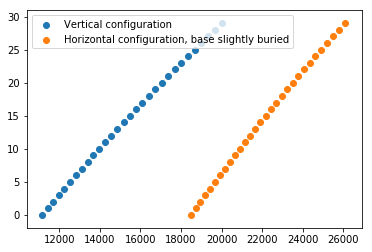

In [15]:
habitat_temps = [(config["T_habitat"]-273) for config in configs_vertical]
import matplotlib.pyplot as plt

plt.scatter(heats_vertical, habitat_temps, label="Vertical configuration")
plt.scatter(heats_horizontal, habitat_temps, label="Horizontal configuration, base slightly buried")
plt.legend()
plt.show()